In [4]:
import pandas as pd
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np
import matplotlib.pyplot as plt
from descriptors.preprocessing import preprocess
import descriptors.dft_featurisation as dft_ft

In [5]:
# Faire les diagrammes croisés par count
nicolit= pd.read_csv("data/NiCOlit.csv")
nicolit= preprocess(nicolit)
X, y, DOI, mechanisms, origins, sub, lig = dft_ft.process_dataframe_dft(nicolit, data_path="data/utils/", origin=False)

2003


Classification des ligands

In [6]:
nicolit['ligand_cat'] = lig
ligand_cat = np.unique(lig)
ligand_cat

array(['DiPhos', 'NHC', 'Phos', 'others'], dtype=object)

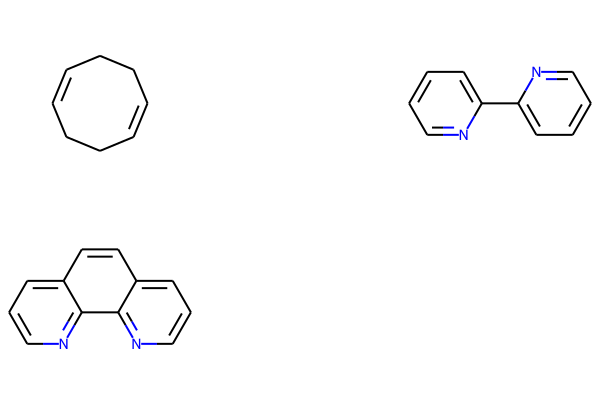

In [7]:
lig_type = 'others'
indexes = np.where(lig == lig_type)[0]
nicolit.effective_ligand
phos = nicolit.effective_ligand[indexes]
phos = np.unique(phos)
mols = [Chem.MolFromSmiles(L) for L in phos]
Draw.MolsToGridImage(mols)

Substrate classification:

In [8]:
nicolit['substrate_cat'] = sub
sub_classes = np.unique(sub)
sub_classes

array(['OAc', 'OC(=O)N', 'OC(=O)O', 'OCH3', 'OCOC', 'OPh', 'OPiv',
       'OSi(C)(C)C', 'Otriazine'], dtype=object)

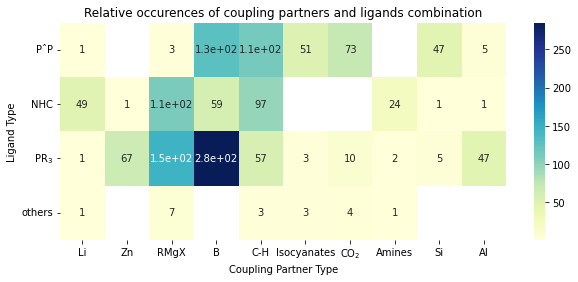

In [12]:
# Plot 1: Ligand-Coupling Partner
cc = nicolit.coupling_partner_class.unique()
m = np.zeros((len(ligand_cat), len(cc)))
mask = np.ones_like(m)
for i in range(np.shape(m)[0]):
    nicolit_lig = nicolit[nicolit['ligand_cat'] == ligand_cat[i]]
    for j in range(np.shape(m)[1]):
        num_cc = len(nicolit[nicolit['coupling_partner_class']==cc[j]])
        m[i][j] = len(nicolit_lig[nicolit_lig['coupling_partner_class']==cc[j]])
        if m[i][j] != 0:
            mask[i][j] = 0

fig = plt.figure(figsize=(10,4))
ax = plt.subplot(111)
sns.heatmap(m, ax=ax, annot=True, cmap="YlGnBu", mask=mask)
ax.set_xticklabels(cc)
ax.set_yticklabels(['PˆP', 'NHC', 'PR$_3$', 'others'])
ax.set_xticklabels(['Li', 'Zn', 'RMgX', 'B', 'C-H', 'Isocyanates',
                   'CO$_2$', 'Amines', 'Si', 'Al'])
ax.set_ylabel("Ligand Type")
ax.set_xlabel("Coupling Partner Type")
ax.tick_params(axis='y', rotation=0)
plt.title("Relative occurences of coupling partners and ligands combination")

fig.savefig("images/cc_lig.png", dpi=300, bbox_inches="tight")
plt.show()

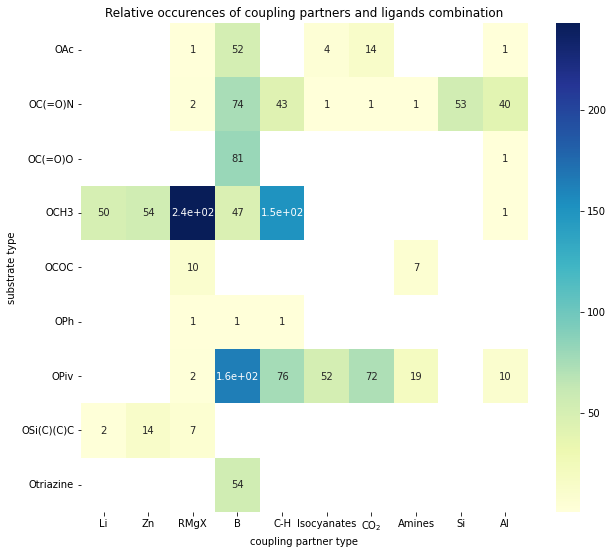

In [11]:
# Plot 2: Ligand-Coupling Partner
m_2 = np.zeros((len(sub_classes), len(cc)))
mask_2 = np.ones((len(sub_classes), len(cc)))
for i in range(np.shape(m_2)[0]):
    nicolit_sub = nicolit[nicolit['substrate_cat'] == sub_classes[i]]
    for j in range(np.shape(m_2)[1]):
        num_cc = len(nicolit[nicolit['coupling_partner_class']==cc[j]])
        num_sub= len(nicolit_sub)
        m_2[i][j] = len(nicolit_sub[nicolit_sub['coupling_partner_class']==cc[j]])
        if m_2[i][j] != 0:
            mask_2[i][j] = 0
            
fig = plt.figure(figsize=(10,9))
ax = plt.subplot(111)

sns.heatmap(m_2, ax=ax, annot=True, cmap="YlGnBu", mask=mask_2)

ax.set_xticklabels(['Li', 'Zn', 'RMgX', 'B', 'C-H', 'Isocyanates',
                   'CO$_2$', 'Amines', 'Si', 'Al'])
ax.set_xlabel("coupling partner type")
ax.set_yticklabels(sub_classes)
ax.set_ylabel("substrate type")
ax.tick_params(axis='y', rotation=0)

fig.savefig("images/cc_sub.png", dpi=300, bbox_inches="tight")

plt.title("Relative occurences of coupling partners and ligands combination")
plt.show()

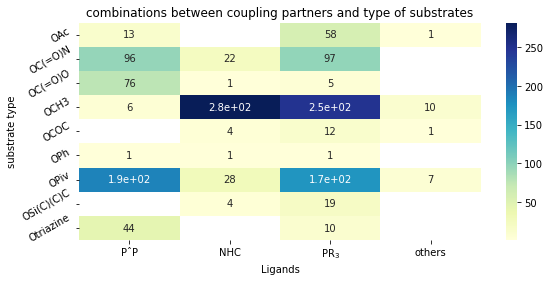

In [13]:
#Plot3 :
m_3 = np.zeros((len(ligand_cat), len(sub_classes)))
mask_3 = np.ones_like(m_3)
for i in range(np.shape(m_3)[0]):
    nicolit_sub = nicolit[nicolit['ligand_cat'] == ligand_cat[i]]
    for j in range(np.shape(m_3)[1]):
        num_cc = len(nicolit[nicolit['substrate_cat']==sub_classes[j]])
        m_3[i][j] = len(nicolit_sub[nicolit_sub['substrate_cat']==sub_classes[j]])
        if m_3[i][j] != 0:
            mask_3[i][j] = 0

fig = plt.figure(figsize=(9,4))
ax = plt.subplot(111)

sns.heatmap(np.transpose(m_3), ax=ax, annot=True, cmap="YlGnBu", mask=np.transpose(mask_3))
ax.set_xlabel("Ligands")
ax.set_xticklabels(['PˆP', 'NHC', 'PR$_3$', 'others'])
ax.set_yticklabels(sub_classes)
ax.set_ylabel("substrate type")
ax.tick_params(axis='x', rotation=0)
ax.tick_params(axis='y', rotation=30)
plt.title("combinations between coupling partners and type of substrates")
plt.show()

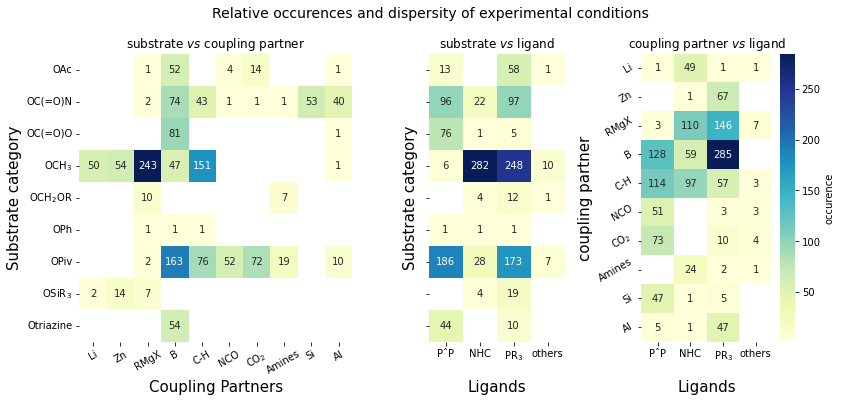

In [14]:
# Large plot :

fig, ax = plt.subplots(figsize=(13, 5), nrows=1, ncols=3, gridspec_kw={'width_ratios': [2, 1, 1.2]})

cp_labels = ['Li', 'Zn', 'RMgX', 'B', 'C-H', 'NCO',
                   'CO$_2$', 'Amines', 'Si', 'Al']
sub_labels = ['OAc', 'OC(=O)N', 'OC(=O)O', 'OCH$_3$', 'OCH$_2$OR', 'OPh',
                   'OPiv', 'OSiR$_3$', 'Otriazine']

# sub-cp
sns.heatmap(m_2, ax=ax[0], annot=True, cmap="YlGnBu", mask=mask_2,
           cbar=False, fmt='.0f')
ax[0].set_yticklabels(sub_labels)
ax[0].set_ylabel("Substrate category", fontsize=15)
ax[0].set_xticklabels(cp_labels)
ax[0].set_xlabel("Coupling Partners", fontsize=15)
ax[0].tick_params(axis='y', rotation=0)
ax[0].tick_params(axis='x', rotation=30)
ax[0].set_title("substrate $vs$ coupling partner")

# sub-cp
sns.heatmap(np.transpose(m_3), ax=ax[1], annot=True, cmap="YlGnBu", 
            mask=np.transpose(mask_3),
            cbar=False, fmt='.0f')
ax[1].set_xticklabels(['PˆP', 'NHC', 'PR$_3$', 'others'])
ax[1].set_xlabel("Ligands", fontsize=15)
ax[1].set_yticklabels([])
ax[1].set_title("substrate $vs$ ligand")
ax[1].set_ylabel("Substrate category", fontsize=15)


# sub-lig
sns.heatmap(np.transpose(m)  , ax=ax[2], 
            annot=True, cmap="YlGnBu", mask=np.transpose(mask),
           fmt='.0f', cbar_kws={'label': 'occurence'})
ax[2].set_xlabel("Ligands", fontsize=15)
ax[2].set_xticklabels(['PˆP', 'NHC', 'PR$_3$', 'others'])
ax[2].set_yticklabels(['Li', 'Zn', 'RMgX', 'B', 'C-H', 'NCO',
                   'CO$_2$', 'Amines', 'Si', 'Al'])
ax[2].tick_params(axis='y', rotation=30)
ax[2].set_title("coupling partner $vs$ ligand")
ax[2].set_ylabel("coupling partner", fontsize=15)

fig.subplots_adjust(wspace=0.4, hspace=0.2, top=0.85, bottom=0.05)
fig.align_xlabels(ax[:])
plt.suptitle("Relative occurences and dispersity of experimental conditions", fontsize=14)

fig.savefig("images/occurences_count.svg", dpi=300, bbox_inches="tight")